In [24]:
! pip install --force-reinstall midii

  Using cached midii-0.1.14-py3-none-any.whl.metadata (4.7 kB)
  Using cached mido-1.3.3-py3-none-any.whl.metadata (6.4 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.19.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached midii-0.1.14-py3-none-any.whl (35 kB)
Using cached mido-1.3.3-py3-none-any.whl (54 kB)
Using cached rich-14.0.0-py3-none-any.whl (243 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached pygments-2.19.1-py3-none-any.whl (1.2 MB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.19.1
    Uninstalling Pygments-2.19.1:
      Successfully uninstalled Pygments-2.19.1
  Attempting unins

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import midii
import copy
from pathlib import Path

In [13]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)
Path(mid.filename).name

'ba_05688_-4_a_s02_m_02.mid'

In [14]:
def calculate_absolute_times(delta_times):
    """Calculates absolute times from delta times."""
    return np.cumsum(np.array(delta_times, dtype=np.int64))

In [18]:
# --- Generate Data for Plotting ---
original_abs_times = calculate_absolute_times(mid.times)

mid.quantize()
quantized_abs_times_with_EF = calculate_absolute_times(mid.times)

mid2 = copy.deepcopy(mid)
mid2.quantize(error_forwarding=False)
quantized_abs_times_naive = calculate_absolute_times(mid2.times)

# Calculate drift (deviation from original absolute time)
drift_naive = quantized_abs_times_naive - original_abs_times
drift_with_EF = quantized_abs_times_with_EF - original_abs_times

# Use event index as x-axis for simplicity
event_index = np.arange(len(mid.times))

In [23]:
print(mid.type)
print(mid2.times)

1
[[0, 0, 0, 0, 0, 0, 0, 480, 1920, 945, 0, 30, 0, 0, 60, 15, 0, 45, 15, 0, 60, 0, 0, 60, 0, 0, 60, 0, 0, 60, 0, 0, 75, 0, 0, 45, 0, 0, 75, 0, 0, 30, 15, 0, 60, 0, 0, 75, 180, 0, 45, 0, 0, 60, 0, 0, 45, 0, 0, 105, 60, 0, 15, 0, 0, 45, 0, 0, 60, 0, 0, 60, 0, 0, 150, 315, 0, 45, 0, 0, 60, 0, 0, 60, 0, 0, 75, 15, 0, 30, 0, 0, 60, 0, 0, 75, 0, 0, 75, 0, 0, 30, 0, 0, 75, 0, 0, 30, 0, 0, 75, 0, 0, 90, 165, 0, 45, 15, 0, 45, 0, 0, 45, 0, 0, 90, 15, 0, 15, 0, 0, 60, 0, 0, 60, 0, 0, 75, 0, 0, 135, 360, 0, 45, 0, 0, 45, 0, 0, 60, 15, 0, 75, 0, 0, 45, 0, 0, 60, 0, 0, 60, 0, 0, 45, 30, 0, 30, 15, 0, 75, 0, 0, 45, 0, 0, 60, 0, 0, 90, 225, 0, 45, 0, 0, 45, 0, 0, 45, 0, 0, 60, 45, 0, 45, 0, 0, 15, 15, 0, 15, 15, 0, 60, 0, 0, 195, 300, 0, 30, 0, 0, 75, 0, 0, 60, 0, 0, 75, 0, 0, 45, 0, 0, 75, 0, 0, 60, 15, 0, 45, 0, 0, 45, 0, 0, 45, 45, 0, 90, 0, 0, 30, 0, 0, 75, 150, 0, 45, 0, 0, 45, 15, 0, 60, 0, 0, 75, 0, 0, 45, 0, 0, 45, 0, 0, 60, 0, 0, 75, 0, 0, 105, 390, 0, 240, 15, 0, 45, 0, 0, 45, 0, 0, 90, 45,

ValueError: x and y must have same first dimension, but have shapes (1,) and (929,)

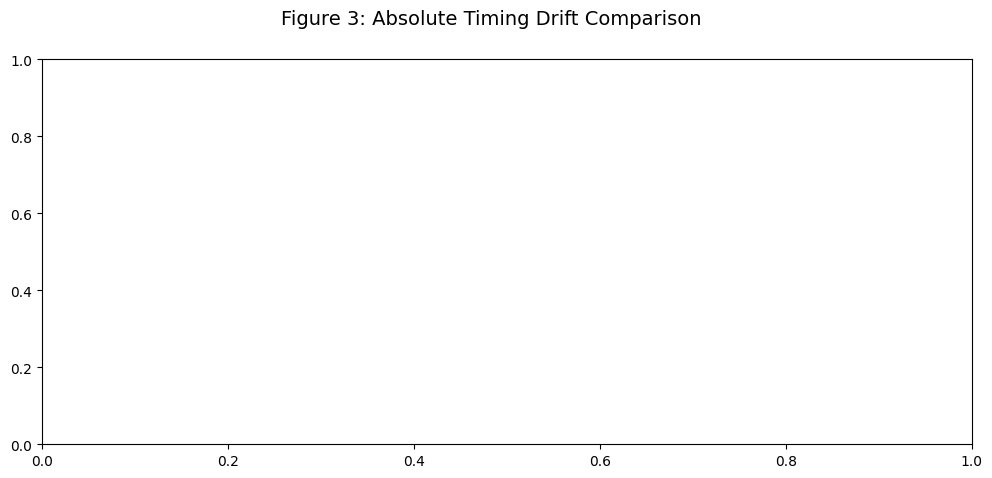

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Figure 3: Absolute Timing Drift Comparison', fontsize=14)

ax.plot(event_index, drift_naive, label='Quantized w/o Error Forwarding (Naive)', alpha=0.8, linewidth=1.5)
ax.plot(event_index, drift_with_EF, label='Quantized w/ Error Forwarding (Proposed)', alpha=0.8, linewidth=1.5)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Original Timing')
ax.set_xlabel("Event Index")
ax.set_ylabel("Timing Drift (Quantized Abs Time - Original Abs Time) [ticks]")
ax.set_title(f"Drift Comparison (Quantization Unit = 1/{int(1/TargetUnitBeat)} Note, TPQN={TPQN})")
ax.grid(True, linestyle=':')
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Use plt.savefig('figure3_drift_comparison.png', dpi=300) for paper